# PROBLEMA DO FLUXO MÁXIMO

O Problema do Fluxo Máximo consiste em encontrar o máximo de fluxo enviado por uma determinada rede direcionada (seja essa rede um tráfego de veículos, um sistema de tubulações hidráulicas, um sistema de tráfego de informações etc). Nesta rede, há um total de $n$ vértices (ou nós), onde o fluxo parte de um nó fonte $s$ e chega em um nó destino $d$, de forma que o fluxo líquido que passa por cada uma das arestas desta rede não supere a sua capacidade máxima $c_{ij}$ (que é a capacidade máxima suportada para um fluxo líquido que viaja do vértice $i$ para o vértice $j$) e nem viaje no sentido contrário do sentido apontado pelas arestas. Particularmente, vamos considerar que o nó fonte seja chamado de $v_{i}$ enquanto o nó destino seja $v_{n}$.

Esse problema pode ser resolvido pela aplicação do algoritmo de Ford-Fulkerson, cuja explicação mais detalhada se encontra nos seguintes links:

* [Algoritmo de Ford-Fulkerson](https://pt.wikipedia.org/wiki/Algoritmo_de_Ford-Fulkerson)
* [Ford-Fulkerson in 5 minutes — Step by step example](https://www.youtube.com/watch?v=Tl90tNtKvxs)

O objetivo deste problema é maximar o fluxo que sai do nó fonte $s$ ou maximizar o fluxo que chega no nó destino $d$ (não faz diferença decidir maximizar uma ou outra, pois ambas devem chegar no mesmo resultado ótimo), cujo modelo abstrato de programação linear é o dado da seguinte forma:

$$
\text{Max } z = \sum_{j=2}^{n} x_{1j} \text{ ou Max } z = \sum_{i=1}^{n-1} x_{in}
$$

$$
\begin{equation}
  \begin{array}{rlll}
    \text{Sujeito a: } & & & \\
    & \sum_{j=2}^{n} x_{1j} = \sum_{i=1}^{n-1} x_{in} & & (1) \\
    & \sum_{j=2}^{n-1} x_{ji} = \sum_{j=2}^{n-1} x_{ij} & , \forall \ i=2,...,n-1 & (2) \\
    & x_{ij} \le c_{ij} & , \forall \ i,j=1,...,n & (3) \\
    & x_{ij} \ge 0 & , \forall \ i,j=1,...,n & (4)
  \end{array}
\end{equation}
$$

Onde:

- $x_{ij}$ é o fluxo que passa pela aresta, indo do vértice $i$ para o $j$;
-  $c_{ij}$ é a capacidade da aresta (caso não exista uma aresta que vai de um certo vértice $i$ para $j$, então admite-se que este $c_{ij}=0$);
-  A restrição $(1)$ indica que o todo o fluxo que sai do nó fonte deve chegar no nó destino;
-  O conjunto $(2)$ de restrições são as equações de continuidade, pois elas garantem que o total de fluxo que entra em cada um dos nós de transbordo (aqueles que não são nem o nó fonte ou o nó origem) seja igual ao total de fluxo que sai de cada um deles;
-  O conjunto $(3)$ garante que nenhum fluxo em uma aresta seja maior que a sua respectiva capacidade máxima;
-  O conjunto $(4)$ garante a não negatividade das variáveis.

# Instância do Problema

> Uma campanhia de saneamento transporta água potável por meio de uma malha de aquedutos de 850 quilômetros na Região Sudeste do Brasil. A campanhia busca determinar o fluxo máximo de água (em m³/s) que pode ser transportado na rede da figura a seguir, que tem como nó de origem (O) a estação de Minas e como nó destino (T) um consumidor final localizado na região central do Estado de São Paulo. Os valores nos arcos representam as capacidades máximas em cada arco (em m³/s).

<center>

![exemplo_fluxo_maximo.png](https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Operations-Research/assets/exemplo_fluxo_maximo.png)

Fonte: [Problema do Fluxo Máximo](https://www.youtube.com/watch?v=f5ks7Axi7Eo)

</center>

Então a formulação deste modelo seria uma instância do problema de fluxo máximo, e pode ser dado como:

$$
\text{Max } z = x_{OA} + x_{OB} \ ou \ \text{Max } z = x_{CT} + x_{DT} \\
$$

$$
\begin{equation}
  \begin{array}{rrcll}
    \text{Sujeito a: } & & \\
    & x_{CT} + x_{DT} & = & x_{OA} + x_{OB} & \text{(Vértices O e T)} \\
    & x_{OA}          & = & x_{AC} + x_{AD} & \text{(Vértice A)} \\
    & x_{OB}          & = & x_{BC} + x_{BD} & \text{(Vértice B)} \\
    & x_{AC} + x_{BC} & = & x_{CT}          & \text{(Vértice C)} \\
    & x_{AD} + x_{BD} & = & x_{DT}          & \text{(Vértice D)} \\
    & x_{OA}          & \le & 50            & \text{(Arco OA)} \\
    & x_{OB}          & \le & 60            & \text{(Arco OB)} \\
    & x_{AC}          & \le & 40            & \text{(Arco AC)} \\
    & x_{AD}          & \le & 60            & \text{(Arco AD)} \\
    & x_{BC}          & \le & 80            & \text{(Arco BC)} \\
    & x_{BD}          & \le & 60            & \text{(Arco BD)} \\
    & x_{CT}          & \le & 50            & \text{(Arco CT)} \\
    & x_{DT}          & \le & 70            & \text{(Arco DT)} \\
    & x               & \ge & 0
  \end{array}
\end{equation}
$$

Onde $x_{ij}$ é a quantidade de fluxo de água (em m³/s) no arco $(i,j)$ enviado de $i$ para $j$.

# Modelando com Pyomo

Para a resolução do problema instanciado com o Pyomo, foi criado uma matriz de-para contendo as capacidades máximas de cada arco do problema dado anteriormente, onde os valores $c_{ij}$ correspondiam as capacidades máximas do arco $(i,j)$. Quando um arco $c_{ij}$ não existia no problema, então foi determinado que $c_{ij}=0$.

Perceba que na matriz abaixo foi atribuido para $c_{TO}$ uma capacidade de 1000 ao invés de 0, o que é um valor bem alto se comparado com o restante das capacidades das outras tubulações. Pois, apesar deste arco não existir no problema proposto, desta forma não será necessário explicitar para o Pyomo quem são os nós origem e destino do nosso problema, pois tudo o que chega no vértice T obrigatoriamente deve ter vindo do vértice O, o que facilita na hora de implementar a codificação.

In [ ]:
# Nome das cidades
cidades = ['O', 'A', 'B', 'C', 'D', 'T']

# Capacidade das arestas:
#                  O   A   B   C   D   T
capacidades = [[   0, 50, 60,  0,  0,  0], # O
               [   0,  0,  0, 40, 60,  0], # A
               [   0,  0,  0, 80, 60,  0], # B
               [   0,  0,  0,  0,  0, 50], # C
               [   0,  0,  0,  0,  0, 70], # D
               [1000,  0,  0,  0,  0,  0]] # T

Perceba que  o $c_{OT} = 1000$ para fazer com que haja uma conexão entre os nós fonte e origem com o intuito de facilitar a modelagem no Pyomo.

Posteriormente, foi criado uma função que importe a biblioteca do Pyomo, e resolva o problema de fluxo máximo usando como parâmetro a matriz de capacidades dos arcos, cujo código é mostrado como se segue:

In [ ]:
def fluxo_maximo(vertices, capacidades):

  import pyomo.environ as pyo    # Importando o Pyomo

  n = len(vertices)              # Total de nós
  modelo = pyo.ConcreteModel()   # Criando uma instância do modelo
  I = modelo.I = pyo.RangeSet(n) # Índice para os vértices fornecedores
  J = modelo.J = pyo.RangeSet(n) # Índice para os vértices demandantes

  # VARIÁVEIS DE DECISÃO
  # Neste caso em particular, xij  é o fluxo de água (em m³/s) no arco de i para j
  x = modelo.x = pyo.Var(I, J, within= pyo.NonNegativeReals)

  # PASSANDO OS PARÂMETROS DO PROBLEMA
  # Capacidades de fluxo para cada um dos arcos (i,j)
  c = modelo.c = pyo.Param(
      I, J,
      initialize= lambda modelo, i, j: capacidades[i-1][j-1])

  # FUNÇÃO OBJETIVO
  # Para esta função, vamos escolher sempre maximizar o fluxo que sai do primeiro vértice do problema
  obj = modelo.obj = pyo.Objective(
      rule= lambda modelo, i: sum(x[i, n] for i in I),
      sense= pyo.maximize
  )

  # RESTRIÇÕES

  # Conjunto 1 de restrições (R1):
  # O total de fluxo que entra em um vértice deve ser igual ao total de fluxo que sai desse vértice.
  modelo.R1 = pyo.Constraint(
      I,
      rule= lambda modelo, i: sum(x[j, i] for j in J) == sum(x[i, j] for j in J)
  )

  # R2: Os fluxos xij não podem ser maiores que as suas respectivas capacidades cij.
  modelo.R2 = pyo.Constraint(
      I, J,
      rule= lambda modelo, i, j: x[i, j] <= c[i, j]
  )

  # RESOLUÇÃO DO MODELO
  gurobi = pyo.SolverFactory('gurobi') # Construindo o solver gurobi
  resultado = gurobi.solve(modelo)     # Armazenando o resultado

  if str(resultado.Solver.status) == 'ok':

    # Imprimindo a função objetiva
    registro = f"FLUXO MÁXIMO\nz = {pyo.value(obj)}\n"

    # Imprimindo as variáveis de decisão selecionadas
    chaves = list(x.keys())
    registro += '\nVARIÁVEIS DE DECISÃO\n'
    for c in chaves:
      valor = pyo.value(x[c])
      if valor != 0:
        registro += f"{vertices[c[0]-1]}-{vertices[c[1]-1]} = {valor:.2f}\n"

  else: # Se status não for 'ok'...

    registro = 'Nenhuma solução válida foi encontrada.'

  return registro

<p align=justify>
&emsp; Cujo resultado encontrado será dado como a seguir:
</p>

In [ ]:
registro = fluxo_maximo(cidades, capacidades)
print(registro)

FLUXO MÁXIMO
z = 110.0

VARIÁVEIS DE DECISÃO
O-A = 50.00
O-B = 60.00
A-D = 50.00
B-C = 40.00
B-D = 20.00
C-T = 40.00
D-T = 70.00
T-O = 110.00



# Resolvendo com NetworkX

A biblioteca NetworkX conta com a função [`maximum_flow()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html#networkx.algorithms.flow.maximum_flow) para executar o algoritmo de Ford-Fulkerson e encontrar o fluxo máximo e os fluxos que passam por cada aresta do grafo. Para isso, é necessário construir o grafo do problema antes de executar o algoritmo.

In [ ]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from(["O","A","B","C","D","T"])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'capacidade' para cada aresta
G.add_edges_from([
    ("O", "A", {'capacidade': 50}),
    ("O", "B", {'capacidade': 60}),
    ("A", "C", {'capacidade': 40}),
    ("A", "D", {'capacidade': 60}),
    ("B", "C", {'capacidade': 80}),
    ("B", "D", {'capacidade': 60}),
    ("C", "T", {'capacidade': 50}),
    ("D", "T", {'capacidade': 70})
])

# Calcula o fluxo máximo e os fluxos em cada aresta
fluxo_max, fluxos = nx.maximum_flow(
    G,
    _s="O",
    _t="T",
    capacity='capacidade'
    )

print(f'Fluxos: {fluxos}')
print(f'Fluxo Máximo: {fluxo_max}')

Fluxos: {'O': {'A': 50, 'B': 60}, 'A': {'C': 0, 'D': 50}, 'B': {'C': 50, 'D': 10}, 'C': {'T': 50}, 'D': {'T': 60}, 'T': {}}
Fluxo Máximo: 110


## Desenhando o grafo

Para definir as posições dos nós do grafo, usou-se a função [`planar_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html) com o intuito de desenhar um grafo planar. Porém, vale lembrar que esta função só funciona se o grafo for realmente planar, isto é, se for possível desenhá-lo sem que haja duas arestas se cruzando. Caso não for possível, a função retornará um erro.

Após desenhar o grafo com a função [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx), será necessário escrever o código para criar os fluxos das arestas, o que é feito usando a função [`draw_networkx_edge_labels()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


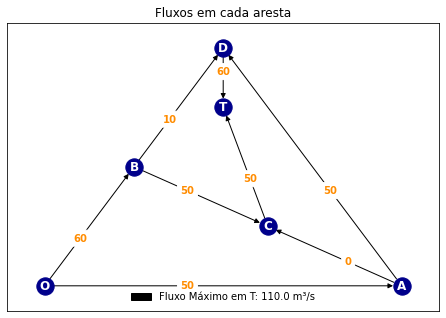

In [ ]:
import matplotlib.pyplot as plt

# Define as posições dos vértices
posicao = nx.planar_layout(G)

# Desenha o grafo original
nx.draw_networkx(
    G,                       # Grafo original
    ax= plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós
    with_labels= True,       # Os nós terão rótulos para exibir os seus nomes
    node_color= 'darkblue',  # Define a cor dos nós como azul escuro
    node_size= 300,          # Define o tamanho dos nós
    node_shape= 'o',         # Define o formato dos nós como círculo
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
    )

# Criando os rótulos para as arestas do grafo G
rotulos_arestas = nx.draw_networkx_edge_labels(
    G,
    pos= posicao,
    ax= plt.axes([0,0,1,1]),
    edge_labels= {(no1, no2): fluxos[no1][no2] for no1 in fluxos for no2 in fluxos[no1]}, # List Comprehension para criar um dicionário dos rótulos
    label_pos= 0.6,
    font_color= 'darkorange',
    font_weight= 'bold',
    rotate= False,
    horizontalalignment= 'center',
    verticalalignment= 'center'
    )

plt.title('Fluxos em cada aresta')
plt.legend(
    labels=[f'Fluxo Máximo em T: {fluxo_max:.1f} m³/s'],
    loc='lower center',
    framealpha= 0
    )

# Exercício

> Considere a rede com sete nós {1, 2, 3, 4, 5, 6, 7}, definida pela tabela a seguir.

<center>

|Arco |Capacidade máxima|
|:---:|:---------------:|
|(1,2)|6|
|(1,3)|7|
|(2,4)|3|
|(3,6)|5|
|(4,5)|3|
|(5,7)|7|
|(2,5)|4|
|(2,3)|1|
|(3,4)|2|
|(4,6)|2|
|(6,5)|2|
|(6,7)|4|

Fonte: ARENALES, Marcos; ARMENTANO, Vinícius; MORANITO, Reinaldo e YANASSE, Horacio. <b>Pesquisa Operacional para Cursos de Engenharia</b>. 2ª edição. Exercício 4.6, pág. 369.

</center>

### (a) Crie a matriz de capacidades

In [ ]:
capacidades = []

### (b) Resolva pelo Pyomo

In [ ]:
import pyomo.environ as pyo



### (c) Resolva pelo NetworkX

In [ ]:
import networkx as nx



### (d) Plote os grafos (original e solução, mostrando os fluxos passando pelos arcos) com Matplotlib

In [ ]:
import matplotlib.pyplot as plt

